### Context

League of Legends adalah MOBA (Multiplayer Online Battle Arena) di mana dalam permainannya terdapat 2 tim (biru dan merah) yang saling berhadapan. Dalam satu laga permainan, ada 3 jalur yang dijadikan medan perang, hutan dan pemainnya terbagi jadi 5 peran. Tujuan permainan ini adalah menjatuhkan Nexus atau base musuh dan memenangkan permainan.

### Content

Diketahui dataset berisi 10 menit dari pertandingan.  Game yang dimainkan berperingkat 10k (SOLO QUEUE Player) dari ELO Diamond I hingga level Master. ELO sendiri merupakan teknik pencarian pemain dengan peringkat atau tingkat keterampilan yang sejenis. Setiap permainan yang terjadi itu unik. GameId dapat membantu kamu mengambil lebih banyak atribut dari Riot API pada kolom dataset. 

Dari data Glossary & Variables, diketahui terdapat 19 fitur pertim (total 38) yang dikumpulkan setelah 10 menit game berlangsung. Data ini termasuk pembunuhan, kematian, emas, pengalaman dan level. Di sini kamu dibebaskan untuk melakukan beberapa rekayasa fitur untuk mendapatkan lebih banyak wawasan atau insight. 

Pada data diketahui juga bahwa kolom **blueWins** adalah nilai target atau nilai yang akan coba diprediksi, di mana jika Nilai 1 berarti tim biru menang, sedangkan jika Nilai 0 maka sebaliknya. 

### Glossary

- Warding totem: Item yang dapat diletakkan pemain di peta untuk mengungkap area terdekat. Sangat berguna untuk kontrol peta/tujuan. 
- Minions: Item yang dapat diletakkan pemain di peta untuk mengungkap area terdekat. Sangat berguna untuk kontrol peta/tujuan.
- Jungle minions: NPC milik NO TEAM. Mereka memberi emas dan buff saat dibunuh oleh pemain.
- Elite monsters: Monster dengan hp/damage tinggi yang memberikan bonus besar (gold/XP/stat) saat dibunuh oleh tim.
- Dragons: Monster elit yang memberikan bonus tim saat terbunuh. Naga ke-4 yang dibunuh oleh tim memberikan bonus statistik yang sangat besar. The - - 5th dragon (Elder Dragon) menawarkan keuntungan besar bagi tim.
- Herald: Monster elit yang memberikan bonus statistik saat dibunuh oleh pemain. Ini membantu untuk mendorong jalur dan menghancurkan struktur.
- Towers: Struktur yang harus Anda hancurkan untuk mencapai Nexus musuh. Mereka memberi emas.
- Level: Champion level. Mulai dari 1. Maksimal 18.

### Variables

1. Gameid : ID RIOT unik dari game. Dapat digunakan dengan Riot Games API.
2. Bluewins: Kolom target. 1 jika tim biru menang, 0 sebaliknya.
3. blueWardsPlaced : Jumlah totem penangkal yang ditempatkan oleh tim biru di peta
4. blueWardsDestroyed : Jumlah totem penangkal musuh yang telah dihancurkan oleh tim biru
5. blueFirstBlood : Pembunuhan pertama dari permainan. 1 jika tim biru melakukan pembunuhan pertama, 0 sebaliknya
6. blueKills : Jumlah musuh yang dibunuh oleh tim biru
7. blueDeaths : Jumlah kematian (tim biru)
8. blueAssists : Jumlah assist kill (tim biru)
9. blueEliteMonsters : Jumlah monster elit yang dibunuh oleh tim biru (Dragons and Heralds)
10. blueDragons : Jumlah naga yang dibunuh oleh tim biru
11. blueHeralds :  Jumlah tentara yang dibunuh oleh tim biru
12. blueTowersDestroyed : Jumlah bangunan yang dihancurkan oleh tim biru (menara...)
13. blueTotalGold : Tim biru total emas
14. blueAvgLevel : Tingkat juara rata-rata tim biru
15. blueTotalExperience : Pengalaman total tim biru
16. blueTotalMinionsKilled : Total minion tim biru terbunuh (CS)
17. blueTotalJungleMinionsKilled : Total monster hutan tim biru terbunuh
18. blueGoldDiff : Perbedaan emas tim biru dibandingkan dengan tim musuh
19. blueExperienceDiff : Tim biru mengalami perbedaan dibandingkan dengan tim musuh
20. blueCSPerMin : CS tim biru (antek) per menit
21. blueGoldPerMin : Emas tim biru per menit
22. redWardsPlaced : Jumlah totem penangkal yang ditempatkan oleh tim merah di peta
23. redWardsDestroyed : Jumlah totem penangkal musuh yang telah dihancurkan oleh tim merah
24. redFirstBlood : Pembunuhan pertama dari permainan. 1 jika tim merah melakukan pembunuhan pertama, 0 sebaliknya
25. redKills : Jumlah musuh yang dibunuh oleh tim merah
26. redDeaths : Jumlah kematian (tim merah)
27. redAssists: Jumlah assist kill (tim merah)
28. redEliteMonsters : Jumlah monster elit yang dibunuh oleh tim merah (Dragons and Heralds)
29. redDragons : Jumlah naga yang dibunuh oleh tim merah
30. redHeralds: Jumlah bentara yang dibunuh oleh tim merah
31. redTowersDestroyed : Jumlah bangunan yang dihancurkan oleh tim merah (menara)
32. redTotalGold: Tim merah total emas
33. redAvgLevel: Tingkat juara rata-rata tim merah
34. redTotalExperience: Pengalaman total tim merah
35. redTotalMinionsKilled : Total minion tim merah tewas (CS)
36. redTotalJungleMinionsKilled : Total monster hutan tim merah terbunuh
37. redGoldDiff : Perbedaan emas tim merah dibandingkan dengan tim musuh
38. redExperienceDiff : Tim merah mengalami perbedaan dibandingkan dengan tim musuh
39. redCSPerMin : CS tim merah (antek) per menit
40. redGoldPerMin : Emas tim merah per menit

## 1. Importing libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

#Standarisasi
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Import Data
df = pd.read_csv('high_diamond_ranked_10min.csv')

In [4]:
# Checking the shape of the data
df.shape

(9879, 40)

In [5]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


## 2. Basic EDA & Data Preprocessing

In [6]:
# Checking null values
df.isnull()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9875,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9877,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# checking data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [8]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [9]:
#checking for quasi constants
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= gameId =================


4519157822    1
4409386215    1
4462322651    1
4523976473    1
4462203064    1
             ..
4424011852    1
4524587916    1
4479120786    1
4521139386    1
4523772935    1
Name: gameId, Length: 9879, dtype: int64


============= blueWins =================


0    4949
1    4930
Name: blueWins, dtype: int64


============= blueWardsPlaced =================


16     1255
15     1217
17      988
14      974
18      831
       ... 
165       1
120       1
148       1
111       1
137       1
Name: blueWardsPlaced, Length: 147, dtype: int64


============= blueWardsDestroyed =================


2     2357
3     2116
1     1790
4     1413
5      746
0      745
6      345
7      163
8       68
9       22
13      14
15      12
10      12
11      12
18      11
17      10
19       9
12       8
16       8
14       7
20       3
21       2
22       2
23       1
24       1
25       1
27       1
Name: blueWardsDestroyed, dtype: int64


============= blueFirstBlood =================


1    4987
0    4892
Name: blueFirstBlood, dtype: int64


============= blueKills =================


6     1322
5     1302
4     1186
7     1138
8      942
3      917
9      717
2      609
10     527
11     340
1      313
12     204
13     147
14      64
0       63
15      38
16      30
17      13
18       4
19       2
22       1
Name: blueKills, dtype: int64


============= blueDeaths =================


5     1341
6     1293
4     1221
7     1188
8      942
3      934
9      734
2      603
10     494
11     331
1      270
12     211
13     114
0       72
14      66
15      32
16      20
17       8
18       2
19       2
22       1
Name: blueDeaths, dtype: int64


============= blueAssists =================


5     1068
4     1010
6      935
3      926
7      880
8      843
2      731
9      648
10     541
1      468
11     414
12     338
13     249
0      217
14     181
15     127
16      94
17      72
18      45
19      27
20      15
22      12
21      11
25       7
23       7
24       6
26       3
29       2
28       1
27       1
Name: blueAssists, dtype: int64


============= blueEliteMonsters =================


0    5156
1    4013
2     710
Name: blueEliteMonsters, dtype: int64


============= blueDragons =================


0    6303
1    3576
Name: blueDragons, dtype: int64


============= blueHeralds =================


0    8022
1    1857
Name: blueHeralds, dtype: int64


============= blueTowersDestroyed =================


0    9415
1     429
2      27
3       7
4       1
Name: blueTowersDestroyed, dtype: int64


============= blueTotalGold =================


15885    9
16749    9
16956    9
15967    8
17951    8
        ..
16798    1
21314    1
19588    1
14811    1
18573    1
Name: blueTotalGold, Length: 4739, dtype: int64


============= blueAvgLevel =================


7.0    2611
6.8    2442
7.2    1779
6.6    1339
7.4     684
6.4     578
6.2     175
7.6     174
6.0      43
7.8      28
5.8      13
5.6       4
5.4       3
8.0       2
5.2       2
4.8       1
4.6       1
Name: blueAvgLevel, dtype: int64


============= blueTotalExperience =================


18530    12
18159    10
17908     9
17857     9
17592     9
         ..
16492     1
18585     1
16017     1
19179     1
14665     1
Name: blueTotalExperience, Length: 4143, dtype: int64


============= blueTotalMinionsKilled =================


218    193
220    192
222    190
229    186
221    185
      ... 
130      1
274      1
142      1
143      1
120      1
Name: blueTotalMinionsKilled, Length: 148, dtype: int64


============= blueTotalJungleMinionsKilled =================


48    816
52    772
44    690
56    618
60    484
     ... 
78      2
82      2
92      1
6       1
88      1
Name: blueTotalJungleMinionsKilled, Length: 74, dtype: int64


============= blueGoldDiff =================


 428     8
 1167    7
-1806    7
-839     6
-27      6
        ..
 5433    1
 4509    1
 2385    1
 4007    1
 927     1
Name: blueGoldDiff, Length: 6047, dtype: int64


============= blueExperienceDiff =================


 63      8
-1025    7
 411     7
-298     7
-226     7
        ..
-1777    1
 108     1
-2790    1
 897     1
 888     1
Name: blueExperienceDiff, Length: 5356, dtype: int64


============= blueCSPerMin =================


21.8    193
22.0    192
22.2    190
22.9    186
22.1    185
       ... 
13.0      1
27.4      1
14.2      1
14.3      1
12.0      1
Name: blueCSPerMin, Length: 148, dtype: int64


============= blueGoldPerMin =================


1588.5    9
1674.9    9
1695.6    9
1596.7    8
1795.1    8
         ..
1679.8    1
2131.4    1
1958.8    1
1481.1    1
1857.3    1
Name: blueGoldPerMin, Length: 4739, dtype: int64


============= redWardsPlaced =================


15     1212
16     1206
17     1055
14     1038
18      733
       ... 
188       1
205       1
112       1
184       1
203       1
Name: redWardsPlaced, Length: 151, dtype: int64


============= redWardsDestroyed =================


2     2421
3     2026
1     1951
4     1346
0      785
5      736
6      316
7      120
8       42
9       26
14      14
13      14
12      12
10      12
15       9
17       8
18       8
11       6
20       6
19       6
16       5
24       3
21       3
22       3
23       1
Name: redWardsDestroyed, dtype: int64


============= redFirstBlood =================


0    4987
1    4892
Name: redFirstBlood, dtype: int64


============= redKills =================


5     1341
6     1293
4     1221
7     1188
8      942
3      934
9      734
2      603
10     494
11     331
1      270
12     211
13     114
0       72
14      66
15      32
16      20
17       8
18       2
19       2
22       1
Name: redKills, dtype: int64


============= redDeaths =================


6     1322
5     1302
4     1186
7     1138
8      942
3      917
9      717
2      609
10     527
11     340
1      313
12     204
13     147
14      64
0       63
15      38
16      30
17      13
18       4
19       2
22       1
Name: redDeaths, dtype: int64


============= redAssists =================


5     1043
4      993
6      981
7      916
3      911
8      779
2      707
9      666
10     563
1      472
11     406
12     318
13     248
0      235
14     198
15     125
16     113
17      61
18      46
19      33
20      25
21      13
22       9
23       9
24       5
25       2
28       1
26       1
Name: redAssists, dtype: int64


============= redEliteMonsters =================


0    4947
1    4202
2     730
Name: redEliteMonsters, dtype: int64


============= redDragons =================


0    5798
1    4081
Name: redDragons, dtype: int64


============= redHeralds =================


0    8298
1    1581
Name: redHeralds, dtype: int64


============= redTowersDestroyed =================


0    9483
1     367
2      29
Name: redTowersDestroyed, dtype: int64


============= redTotalGold =================


16074    9
16561    8
16379    8
17404    8
16154    8
        ..
17470    1
19687    1
18392    1
14748    1
16399    1
Name: redTotalGold, Length: 4732, dtype: int64


============= redAvgLevel =================


7.0    2672
6.8    2392
7.2    1838
6.6    1275
7.4     713
6.4     540
7.6     196
6.2     150
6.0      52
5.8      18
7.8      17
5.6       5
5.4       3
8.0       3
4.8       2
5.0       1
8.2       1
5.2       1
Name: redAvgLevel, dtype: int64


============= redTotalExperience =================


17842    10
17501     9
17608     9
17680     9
17212     9
         ..
20138     1
16317     1
20483     1
17208     1
19909     1
Name: redTotalExperience, Length: 4113, dtype: int64


============= redTotalMinionsKilled =================


215    198
218    192
220    191
225    188
221    184
      ... 
279      1
135      1
277      1
107      1
137      1
Name: redTotalMinionsKilled, Length: 153, dtype: int64


============= redTotalJungleMinionsKilled =================


52    894
48    850
56    719
44    686
60    549
     ... 
16      1
4       1
89      1
17      1
91      1
Name: redTotalJungleMinionsKilled, Length: 75, dtype: int64


============= redGoldDiff =================


-428     8
-1167    7
 1806    7
 839     6
 27      6
        ..
-5433    1
-4509    1
-2385    1
-4007    1
-927     1
Name: redGoldDiff, Length: 6047, dtype: int64


============= redExperienceDiff =================


-63      8
 1025    7
-411     7
 298     7
 226     7
        ..
 1777    1
-108     1
 2790    1
-897     1
-888     1
Name: redExperienceDiff, Length: 5356, dtype: int64


============= redCSPerMin =================


21.5    198
21.8    192
22.0    191
22.5    188
22.1    184
       ... 
27.9      1
13.5      1
27.7      1
10.7      1
13.7      1
Name: redCSPerMin, Length: 153, dtype: int64


============= redGoldPerMin =================


1607.4    9
1656.1    8
1637.9    8
1740.4    8
1615.4    8
         ..
1747.0    1
1968.7    1
1839.2    1
1474.8    1
1639.9    1
Name: redGoldPerMin, Length: 4732, dtype: int64

In [10]:
# Drop Duplicate
df = df.drop_duplicates(keep='first')
df.shape

(9879, 40)

In [11]:
# Drop Variabel yang tidak dibutuhkan
df = df.drop('gameId', axis =1)

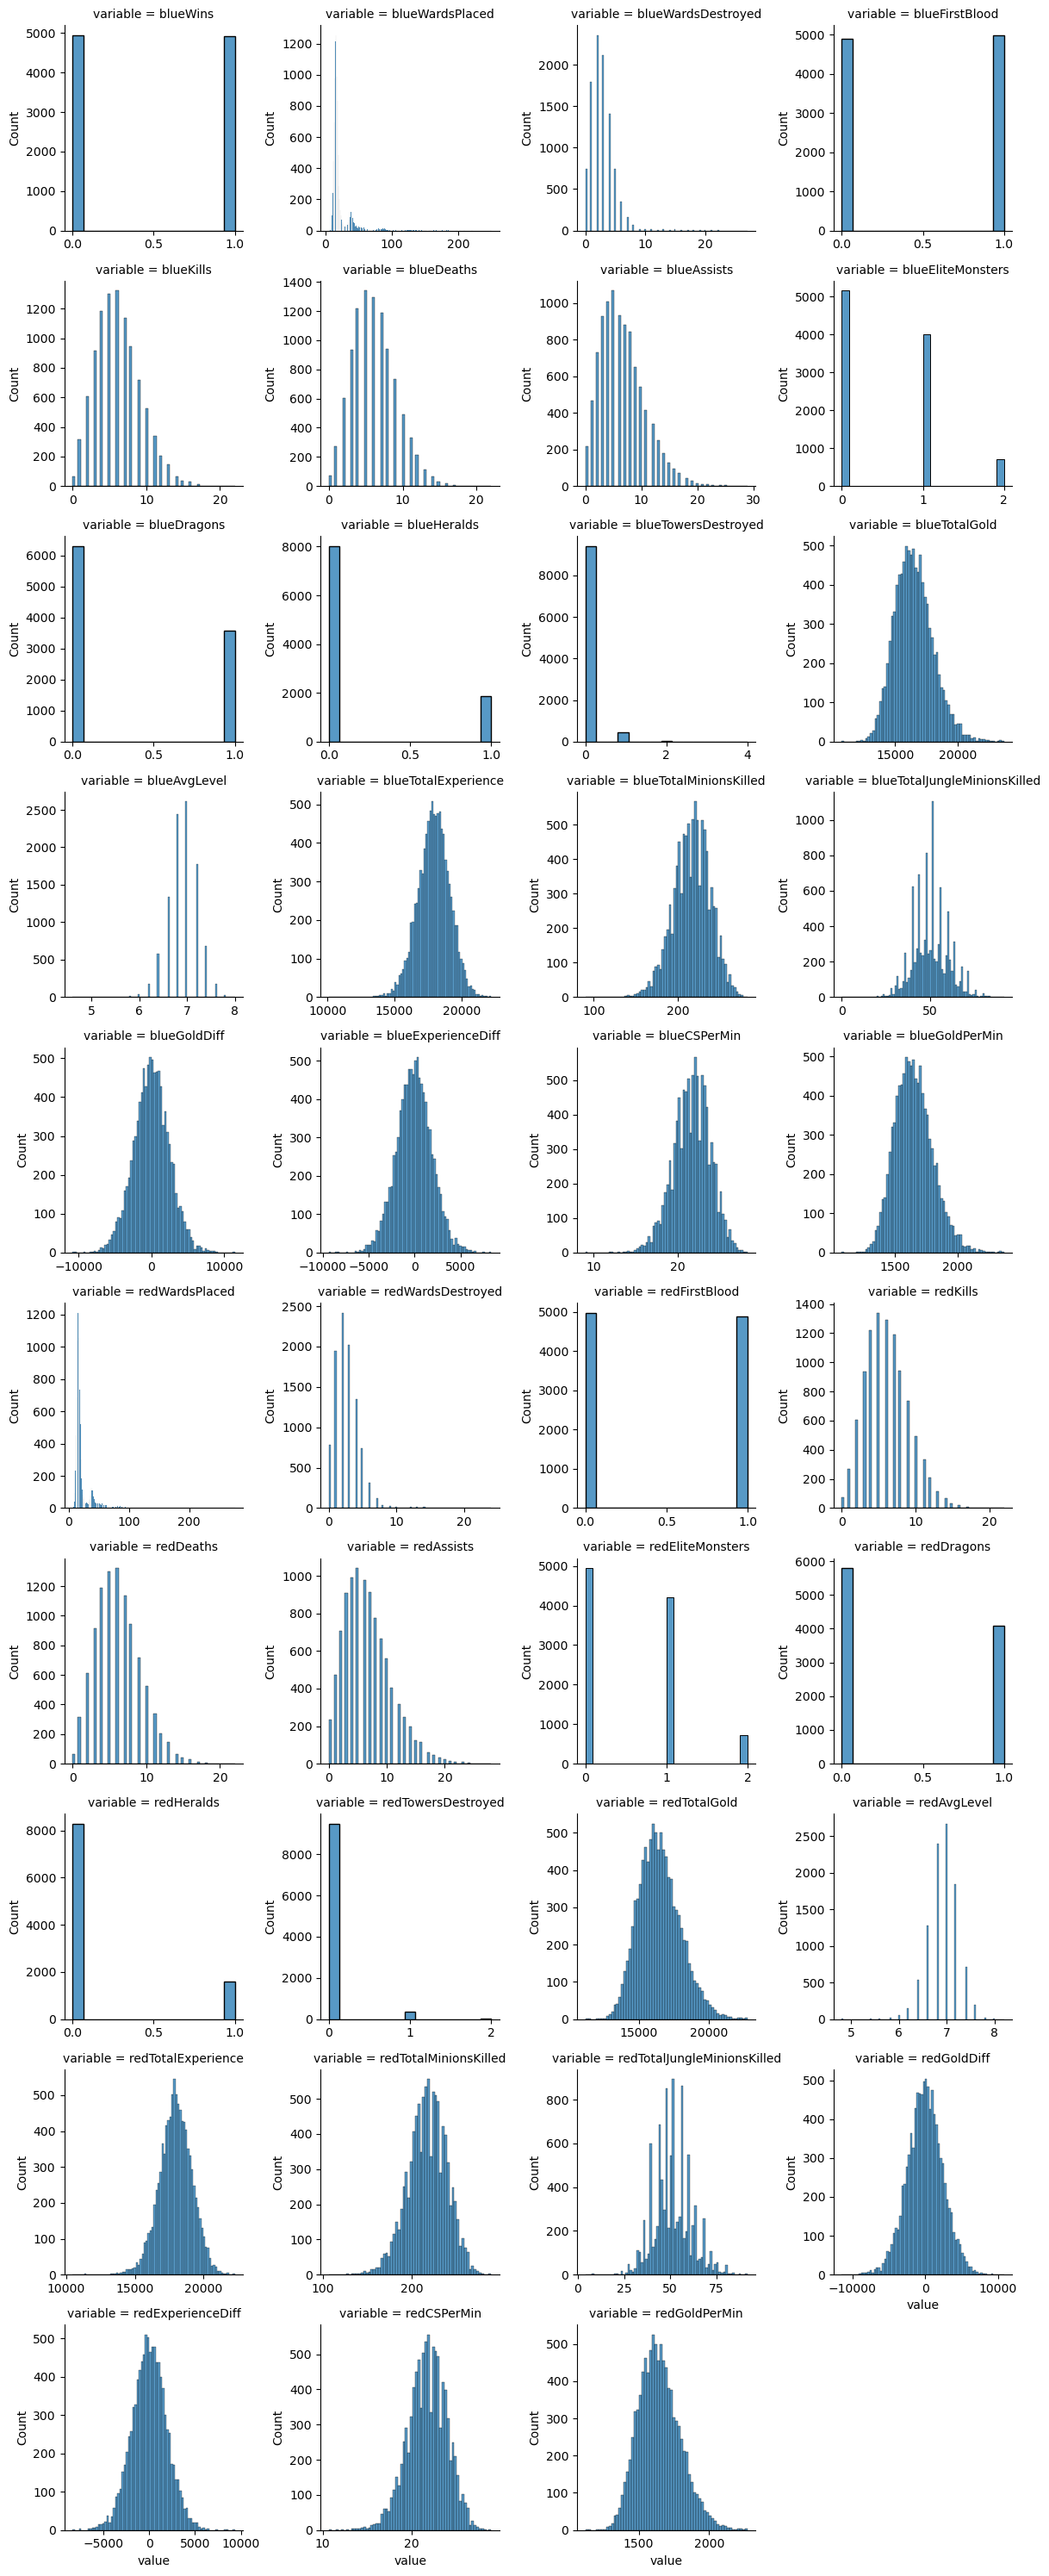

In [12]:
# Bar plot of the outcomes to see how they are distributed
f = pd.melt(df, value_vars=df.columns)
g = sns.FacetGrid(f, col="variable", col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.histplot, "value")

In [13]:
# Value counts data blueWins
df['blueWins'].value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

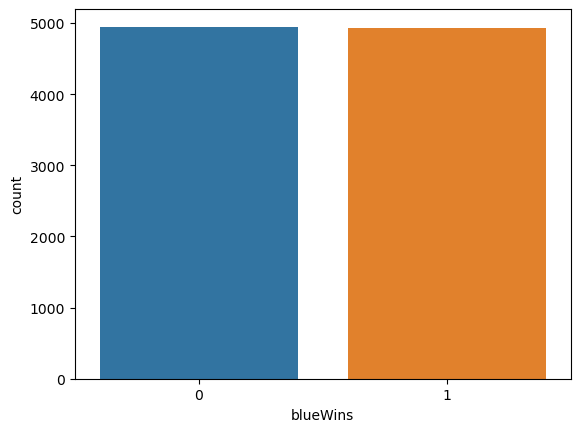

In [14]:
sns.countplot(x='blueWins',data=df);

In [15]:
x = df.drop('blueWins', axis=1).values
y = df['blueWins'].values

In [16]:
#standarisasi
scaler = MinMaxScaler(feature_range =(0,1))
x = scaler.fit_transform(x)
x =pd.DataFrame(x)

# catatan dari hasil data preprocessing
* berdasarkan hasil dari data prpocessing dapat dillihat bahwa semua variabel dalam bentuk numerik.
* Untuk data blueWins yang dijadikan variabel target sudah dalam bentuk boolean dimana 0 tim biru kalah dan 1 tim biru menang.
* Perbandingan variabel blueWin antara menang dan kalah termasuk balance.
* Dari visualisasiyang telah dibuat kebanyakan data sudah terdistribusi normal.
* Data sudah terlihat standar dan tidak perlu banyak melakukan prepocesing.
* Karena seluru variabel merupakan tipe umerik maka perlu adanya standarisasi dan tifak perlu melakukan encoding.

#### Importing required libraries

In [17]:
#Split data into Train and Test 
from sklearn.model_selection import train_test_split

#Import sklearn classes 
from sklearn.model_selection import train_test_split,RepeatedKFold, cross_val_score,KFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#libraries for evaluation classification project
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, ConfusionMatrixDisplay,roc_auc_score,roc_curve

## 3. Data Splitting into train and test set

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state =42)
print("X_train dataset: ", x_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", x_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (7903, 38)
y_train dataset:  (7903,)
X_test dataset:  (1976, 38)
y_test dataset:  (1976,)


## 4. Feature Selection and Compare Each Model

Method 1: Feature Selection using different methods and checking with different models

Feature Selection using Feature importance of Random Forest Classifier

#### 1. KNN

In [19]:
knn = KNeighborsClassifier(n_neighbors = 2) #set K neighbor as 3
knn.fit(x_train,y_train) 
predicted_y = knn.predict(x_test)
print("KNN accuracy according to K=3 is :",knn.score(x_test,y_test))

KNN accuracy according to K=3 is : 0.6356275303643725


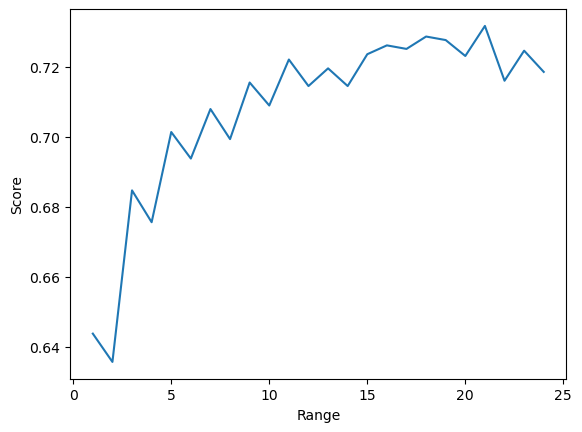

In [20]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(x_train,y_train)
    score_array.append(knn_loop.score(x_test,y_test))
    ""
plt.plot(range(1,25),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 21)
knn.fit(x_train,y_train) 
predicted_y = knn.predict(x_test)
print("KNN accuracy according to K=21 is :",knn.score(x_test,y_test))

KNN accuracy according to K=21 is : 0.7317813765182186


#### 2. Logistic Regression

In [22]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
accuracy_lr = lr_model.score(x_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.729757085020243


C:\Users\WINARDI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 3. Decision Tree Classification

In [23]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
accuracy_dt = dt_model.score(x_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.6285425101214575


#### 4. Random Forest

In [24]:
rf_model_initial = RandomForestClassifier(n_estimators = 5, random_state = 1)
rf_model_initial.fit(x_train,y_train)
print("Random Forest accuracy for 5 trees is :",rf_model_initial.score(x_test,y_test))

Random Forest accuracy for 5 trees is : 0.680161943319838


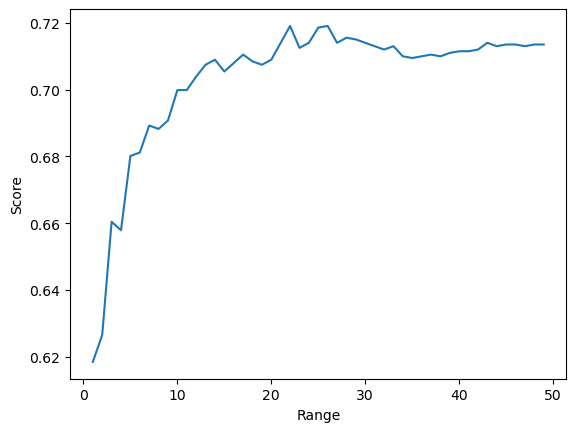

In [53]:
score_array = []
for each in range(1,50):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) #set K neighbor as 3
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))
    
plt.plot(range(1,50),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_model_initial = RandomForestClassifier(n_estimators = 22, random_state = 1)
rf_model_initial.fit(x_train,y_train)
print("Random Forest accuracy for 5 trees is :",rf_model_initial.score(x_test,y_test))

Random Forest accuracy for 5 trees is : 0.7191295546558705


#### 5. Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
accuracy_nb = nb_model.score(x_test,y_test)
print("Naive Bayes accuracy is :",accuracy_nb)

Naive Bayes accuracy is : 0.7236842105263158


#### 7. Gradient Boosting 

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting  Accuracy:", accuracy)

Gradient Boosting  Accuracy: 0.7322874493927125


## 5. Modelling and Evaluation


In [28]:
def model_evaluation(model,name):
    confusion_matrix = pd.crosstab(y_test, model, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.xticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.show()

In [29]:
# the function that prints all scores
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)

In [30]:
print_scores("========Logistic Regression=========;",y_test, lr_model.predict(x_test))
print('========================')
print_scores("=========Naive Bayes=========;",y_test, nb_model.predict(x_test))
print('========================')
print_scores("=========Decision Tree=========;",y_test, dt_model.predict(x_test))
print('========================')
print_scores("=========Random Forest=========;",y_test, rf_model_initial.predict(x_test))
print('========================')
print_scores("=========KNN=========;",y_test, knn.predict(x_test))
print('========================')
print_scores("========Gradient Boosting =========;",y_test, model.predict(x_test))
print('========================')

========Logistic Regression=========;
accuracy:  0.729757085020243
precision:  0.7311178247734139
recall:  0.7311178247734139
f1_score:  0.729757085020243
=========Naive Bayes=========;
accuracy:  0.7236842105263158
precision:  0.7269035532994924
recall:  0.7210473313192346
f1_score:  0.723685342802179
=========Decision Tree=========;
accuracy:  0.6285425101214575
precision:  0.6275862068965518
recall:  0.6414904330312186
f1_score:  0.6284755182963518
=========Random Forest=========;
accuracy:  0.7191295546558705
precision:  0.7319915254237288
recall:  0.6958710976837865
f1_score:  0.718992035860708
=========KNN=========;
accuracy:  0.7317813765182186
precision:  0.7384140061791967
recall:  0.7220543806646526
f1_score:  0.7317632407902565
========Gradient Boosting =========;
accuracy:  0.7322874493927125
precision:  0.7381930184804928
recall:  0.7240684793554885
f1_score:  0.7322757247404454


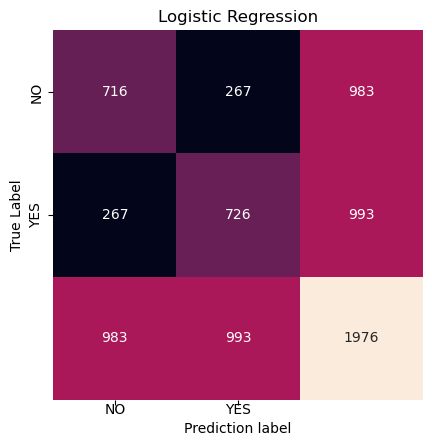

In [31]:
model_evaluation(lr_model.predict(x_test),"Logistic Regression")

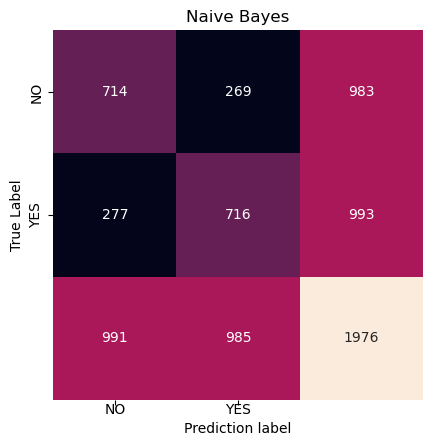

In [32]:
model_evaluation(nb_model.predict(x_test),"Naive Bayes")

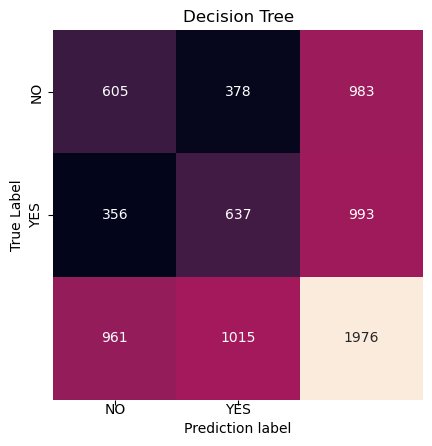

In [33]:
model_evaluation(dt_model.predict(x_test),"Decision Tree")

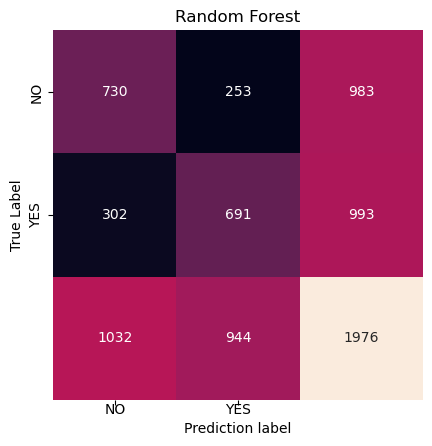

In [34]:
model_evaluation(rf_model_initial.predict(x_test),"Random Forest")

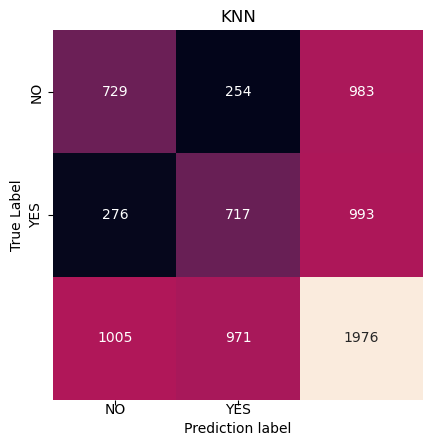

In [35]:
model_evaluation(knn.predict(x_test),"KNN")

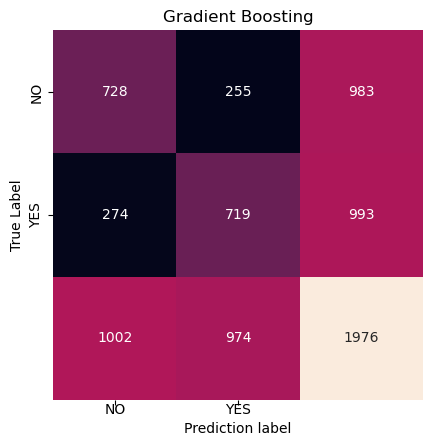

In [36]:
model_evaluation(model.predict(x_test),"Gradient Boosting")

#### Simpulan :

1. Dari meberapa model yang digunakan dapat dilihat yang mempunyai akurasi tertinggi adalah Gradient Boosting, KNN, dan Logistic Regression.
2. Dari evaluasi yang dilakukan dapat dilihat yang mempunya nilai terbaik dari Precison, Recall, F1_score adalah Gradient Boosting, KNN, dan Logistic Regression.
3. Dari confusin Matrix yang dilakukan dapat dilihat yang paling sedikit nilai False-nya adalah Gradient Boosting, KNN, dan Logistic Regression.
4. Dari beberapa model yang telah diterapkan saya merekomendarikan untuk menggunakan Gradient Boosting karena mendapatkan acuracy serta evaluasi yang lebih bik daari yang lainnya.
6. Namun acuracy yang didapat hanya 73 tidak begitu baik dan masih perlu diperbaiki datanya baik itu perlu melakukan data preprocesing yang lebih baik seperti menghilankan outlier atau memilih hanya variabel-variabel tertentu saja.